# Diabetes Prediction Model 

# Importing Necessary Libraries

In [68]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# reading and loading the dataset

In [69]:
df=pd.read_csv('diabetes dataset project.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [71]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [72]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Checking null values

In [73]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [38]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Exploratory Data Analysis (EDA)

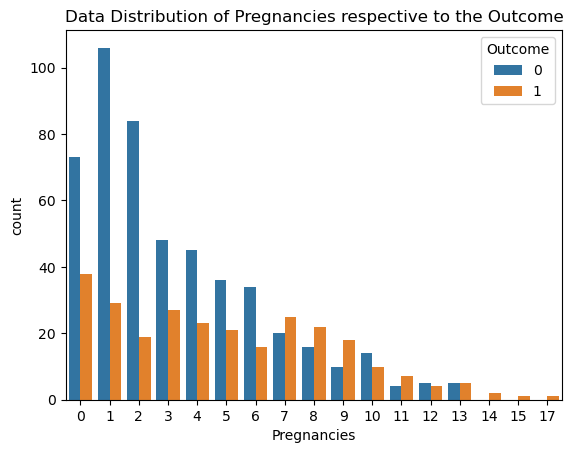

In [78]:
sns.countplot(data=df, x="Pregnancies", hue="Outcome")
plt.title("Data Distribution of Pregnancies respective to the Outcome")
plt.show()

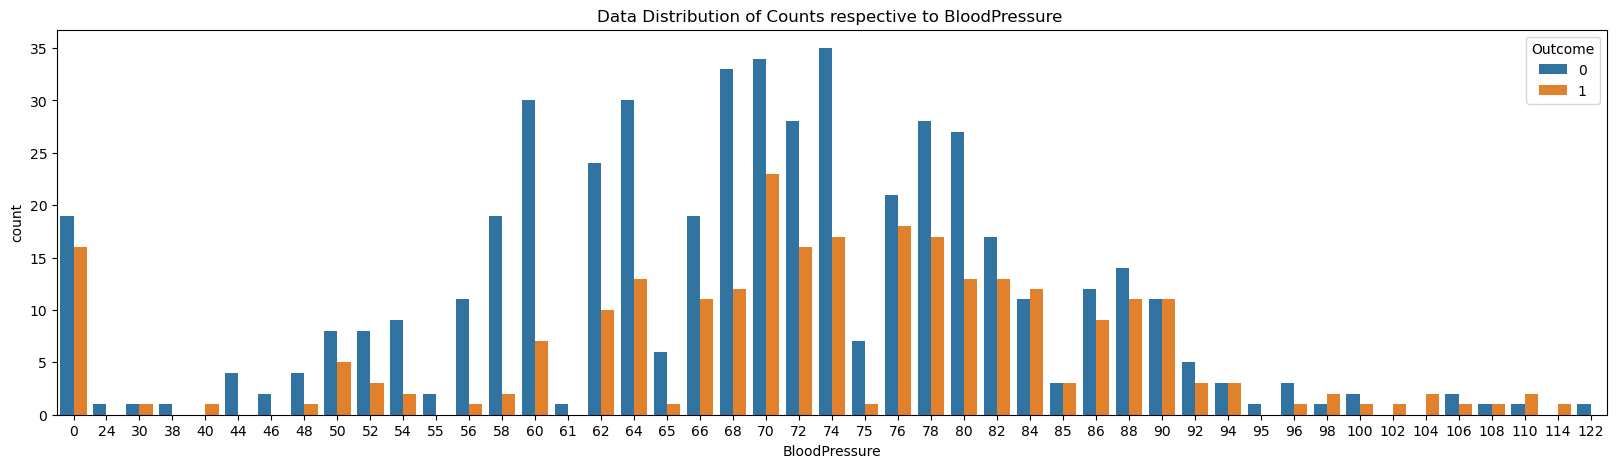

In [96]:
plt.figure(figsize=(20,5))
sns.countplot(data=df, x="BloodPressure", hue='Outcome')
plt.title("Data Distribution of Counts respective to BloodPressure ")
plt.show()

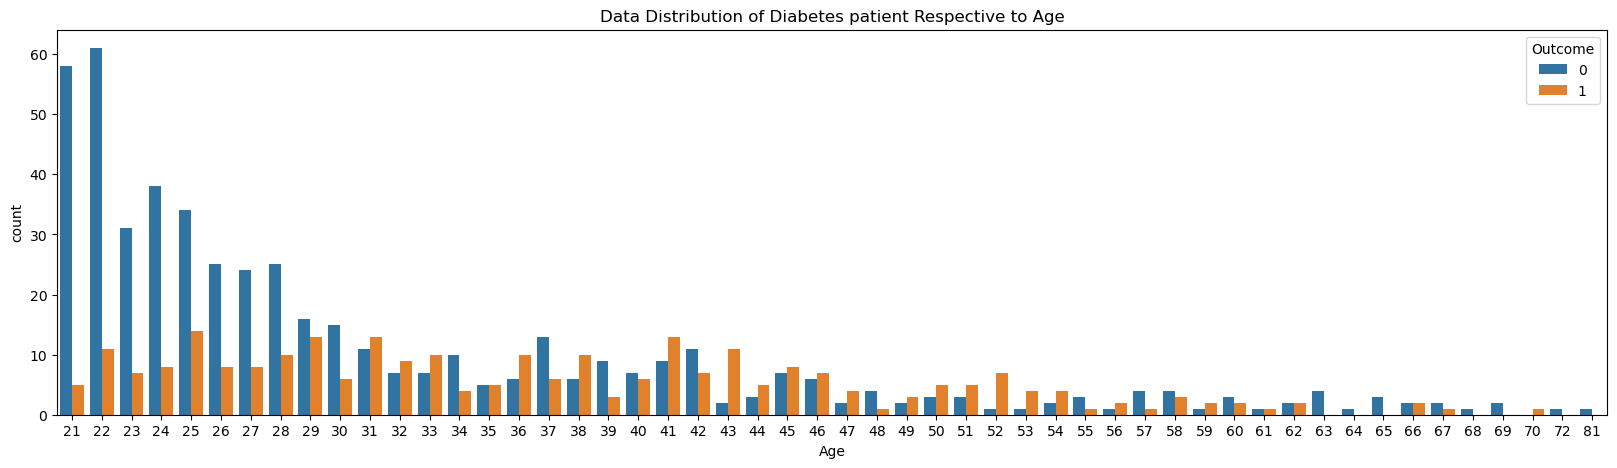

In [88]:
plt.figure(figsize=(20,5))
sns.countplot(data=df, x='Age', hue='Outcome')
plt.title("Data Distribution of Diabetes patient Respective to Age")
plt.show()

# Standardizing the Data

In [155]:
std = MinMaxScaler()
std_array = std.fit_transform(x)
df_std = pd.DataFrame(std_array, columns=x.columns)
df_std

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


# Assigning the Dependent and Independent Attributes

In [132]:
x = df_std
y = df['Outcome']

In [133]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


In [134]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

# Model Splitting 

In [135]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# Prediction Using Random Classifier

In [136]:
Rs_mod = RandomForestClassifier()

In [137]:
Rs_mod.fit(x_train,y_train)

RandomForestClassifier()

# Training Data Analysis 

In [138]:
y_pred_train = Rs_mod.predict(x_train)

In [139]:
print("Accuracy Score is:", accuracy_score(y_train,y_pred_train))

Accuracy Score is: 1.0


In [140]:
print("Classification Report is:", classification_report(y_train,y_pred_train))

Classification Report is:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       213

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



# Testing Data Analysis

In [141]:
y_pred = Rs_mod.predict(x_test)

# Printing the accuracy score and classification report

In [142]:
print("Accuracy Score is:", accuracy_score(y_test,y_pred))

Accuracy Score is: 0.7597402597402597


In [143]:
print("Classification Report is:", classification_report(y_test,y_pred))

Classification Report is:               precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



# The final model accuracy score after Random Forest is 75%

# Prediction using Decision tree 

In [144]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [145]:
Dt_model = DecisionTreeClassifier()

In [146]:
Dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

# Training Data Analysis

In [147]:
y_pred_train = Dt_model.predict(x_train)

In [148]:
print("Accuracy Score is:", accuracy_score(y_train,y_pred_train))

Accuracy Score is: 1.0


In [149]:
print("Classification Report is:", classification_report(y_train,y_pred_train))

Classification Report is:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       213

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



# Testing Data Analysis

In [150]:
y_pred = Dt_model.predict(x_test)

In [151]:
print("Accuracy Score is:", accuracy_score(y_test,y_pred))

Accuracy Score is: 0.7402597402597403


In [152]:
print("Classification Report is:",classification_report(y_test,y_pred))

Classification Report is:               precision    recall  f1-score   support

           0       0.82      0.77      0.79        99
           1       0.62      0.69      0.66        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154



# The final model accuracy score after Decision Tree Analysis is 74%

# Model for Prediction 

In [153]:
prediction = Rs_mod.predict(df_std)
if(prediction[0] == 0):
    print('Not Diabetic')
else:
    print('Diabetic')

Diabetic


In [154]:
prediction = Dt_model.predict(df_std)
if(prediction[1] == 1):
    print('Not Diabetic')
else:
    print('Diabetic')

Diabetic


# Pie Chart Showing the Distribution of Diabetec And Non-Diabetic Patients

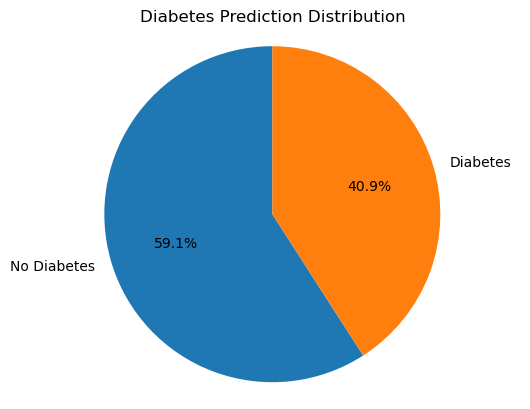

In [115]:
labels= ['No Diabetes', 'Diabetes']
sizes = [y_pred.tolist().count(0), y_pred.tolist().count(1)]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("Diabetes Prediction Distribution")
plt.show()